In [2]:
from bhat.bhat import bhattacharyya

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats

In [20]:
def sim(diffs, sigm):
    return np.exp(-diffs**2/sigm)

In [23]:
print(sim(np.array(ms), 1))

[9.99998626e-001 9.45455494e-001 3.92861097e-001 9.33057237e-003
 2.06654182e-007 5.96567404e-016 2.09037117e-039 3.22507370e-066
 4.96838760e-110 3.58768025e-177 1.53175153e-275 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.000000

In [30]:
np.random.seed(42)
mean = np.array([100, 100])
cov = np.array([[1, 0], [0, 1]])  # diagonal covariance

N = 100

ms = []
rs = []
XGT = np.random.multivariate_normal(mean, cov, 1000)
for i in range(N):
    X = np.random.multivariate_normal(mean, cov, 1000)
    Y = np.random.multivariate_normal(mean+(i), cov, 1000)
    R = np.random.random((1000, 2)) * 1
    ms.append(bhattacharyya(X,Y))
    rs.append(bhattacharyya(X,R))
    

Text(0, 0.5, 'Distance')

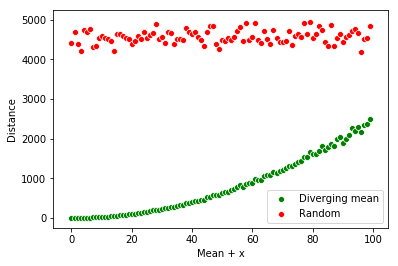

In [31]:
sns.scatterplot(x=[i for i in range(N)], y=ms, color='g', label='Diverging mean')
sns.scatterplot(x=[i for i in range(N)], y=rs, color='r', label='Random')
plt.xlabel("Mean + x")
plt.ylabel("Distance")

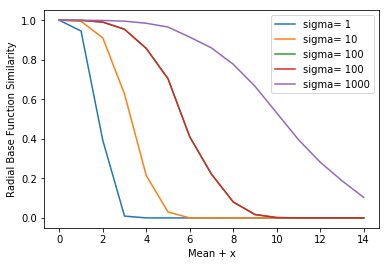

In [59]:
M = 15
sigs = [1, 10, 100, 100, 1000]
for s in sigs:
    sns.lineplot(x=[i for i in range(M)], y=np.concatenate( [sim(np.array(ms[:M]), s)]), label="sigma= {}".format(s))
plt.legend()
plt.xlabel("Mean + x");
plt.ylabel("Radial Base Function Similarity");